In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df_path= Path('/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta')
df = pd.read_stata(df_path, convert_categoricals=False)
pd.set_option('display.max_columns', None)
df.head()

/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14134/141504368.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(df_path, convert_categoricals=False)


,PUMFID,gender,PGM_034,PGM_P036,work_placement,PGM_280A,PGM_280B,PGM_280C,PGM_280D,PGM_280E,entrep,PGM_290,PGM_350,PGM_380,PGM_P400,gpa,PGM_410,PGM_415,PGM_430,PGM_440,EDU_010,EDU_020,student_loan,STL_020,STL_030,STL_080,STL_100A,STL_100B,STL_100C,STL_100D,STL_130,STL_150,STL_160B,STL_160C,STL_160D,STL_160E,STL_160F,STL_160G,STL_160H,STL_160I,STL_160J,STL_160L,STLP160N,STL_170A,STL_170B,STL_170C,STL_170D,STL_170E,STL_170F,STL_170G,STL_170H,STL_170I,STL_170J,STL_170L,STLP170N,STL_190,LFW_010,LFW_P020,LFW_120,LFW_P140,LFW_270,LFW_280,LFW_370,LFW_400,LFW_410,LFW_420A,LFW_420B,LFW_420C,LFW_440,AFT_P010,AFT_020,AFT_P040,AFT_050,AFT_070,AFT_080,AFT_090,BEF_P140,BEF_P150,BEF_160,DEM_P010,DEM_P030,DEM_P140,GRADAGEP,REG_INST,cert_lvl,program,coop,PREVLEVP,HLOSGRDP,HLOSINTP,STULOANS,OWESLGD,OWEGVIN,SRCFUND,RESP,SCHOLAR,DBTOTGRD,DBTOTINT,DBTALGRD,DBTALINT,LFSTAT,LFCINDP,occup,LFWFTPT1,JOBQLEVP,JOBQLGRD,JOBQLINT,JOBINCP,income,REG_RESP,VISBMINP,CTZSHIPP,LHOMEP,LFIRSTP,FATHEDP,FATEDGRD,FATEDINT,MOTHEDP,MOTEDGRD,MOTEDINT,DDIS_FL,DTYPERP,DCLASSP,WTPF,rel_educ,gpa_new,fitted,inst_rep,_est_est1,yhat
0,28113,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,2.0,6.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,NaN,2.0,3.0,1.0,2.0,2.0,0.0,3.0,1.0,4,1.0,5.0,2.0,NaN,1.0,2.0,2.0,NaN,NaN,3.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,6.0,5.0,NaN,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,2,NaN,0.0,32.2057,1.0,2.0,4.051403,0.0,1,3.914762
1,28114,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,NaN,2.0,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,3.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4,2.0,4.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,3.0,3.0,6.0,3.0,3.0,6.0,3.0,3.0,2,NaN,0.0,11.0231,3.0,1.0,NaN,1.0,0,NaN
2,28117,1,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN,2.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,1.0,1.0,2.0,2.0,7.0,7.0,NaN,2.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,2,NaN,0.0,10.6000,2.0,3.0,4.546651,0.0,1,4.634356
3,28118,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,NaN,3.0,3.0,2.0,6.0,1.0,0.0,1.0,2.0,4,3.0,5.0,1.0,2.0,3.0,3.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,2.0,3.0,2.0,1.0,3.0,5.0,1.0,2.0,1.0,1.0,8.0,7.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1,1.0,1.0,10.4117,1.0,3.0,6.949412,0.0,1,7.035017
4,28121,2,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,1.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,0.0,3.0,0.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,7.0,6.0,NaN,2.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,3.0,3.0,1,2.0,1.0,11.3271,3.0,2.0,4.265996,0.0,1,4.337170


In [3]:
import numpy as np
df.replace('.d', np.nan, inplace=True)

In [4]:
#drop empty values 
df = df.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup'])
df['year_grad']= 1 

/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14134/3024751120.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year_grad']= 1


In [5]:
x = df[['gpa_new', 'GRADAGEP', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup']]
y = df[['income']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 1)

In [6]:
model =LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

5.329678105550928

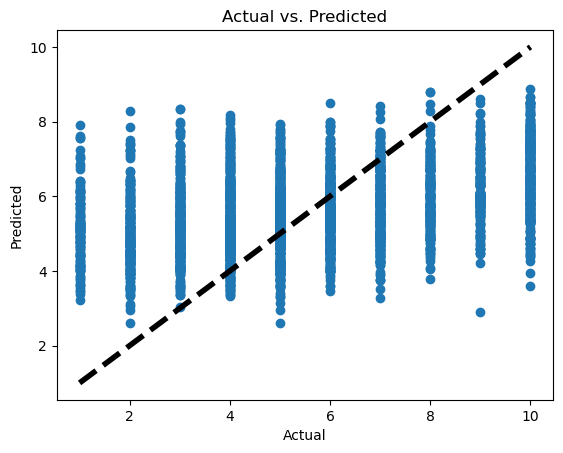

In [7]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [8]:
'''1 get the data together 
    find the columns you need for study and seperate it into a new df for both years 
    make sure the values represent the same thing 
    get summary statistics 
    explore a linear regression model 
    explore a heteroskedasticity robust( or other types of linear model)
    redo the heatmap for the new dataset
    consider using the partial regressions'''


'1 get the data together \n    find the columns you need for study and seperate it into a new df for both years \n    make sure the values represent the same thing \n    get summary statistics \n    explore a linear regression model \n    explore a heteroskedasticity robust( or other types of linear model)\n    redo the heatmap for the new dataset\n    consider using the partial regressions'

In [9]:
# change the name of GRADAGEP and create a new shorter dataframe 
df.rename(columns={'GRADAGEP': 'age'}, inplace=True)
subset_columns = ['income', 'gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup', 'year_grad']
df_new= df[subset_columns].copy()

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12682 entries, 0 to 17484
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        12682 non-null  float64
 1   gpa_new       12682 non-null  float32
 2   age           12682 non-null  float64
 3   coop          12682 non-null  float64
 4   inst_rep      12682 non-null  float32
 5   student_loan  12682 non-null  float64
 6   gender        12682 non-null  int8   
 7   program       12682 non-null  float64
 8   occup         12682 non-null  float64
 9   year_grad     12682 non-null  int64  
dtypes: float32(2), float64(6), int64(1), int8(1)
memory usage: 904.1 KB


In [11]:
x= df_new[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup']]
y= df_new[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     325.8
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:16:42   Log-Likelihood:                -28699.
No. Observations:               12682   AIC:                         5.742e+04
Df Residuals:                   12673   BIC:                         5.748e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0045      0.180     27.833   

In [12]:
##for fun lasso 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))  # You can adjust the alpha parameter for regularization strength

# Fit the Lasso regression model
lasso_pipeline.fit(x, y)


# Get the feature names
feature_names = x.columns

# Get the coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
# Print the coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefs})

# Print the coefficients as a table
print(coefficients_df)

        Feature  Coefficient
0         const     0.000000
1       gpa_new     0.223623
2           age     0.634409
3          coop    -0.000000
4      inst_rep     0.002470
5  student_loan    -0.060289
6        gender    -0.186988
7       program     0.083724
8         occup    -0.379409


In [13]:
df_labels = pd.read_stata(df_path)
pd.set_option('display.max_columns', None)
df_labels = df_labels.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup'])
df_labels[['income', 'gpa_new', 'GRADAGEP', 'coop', 'inst_rep', 'student_loan', 'gender', 'program', 'occup']]. head(10)


/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14134/2782622441.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_labels = pd.read_stata(df_path)


,income,gpa_new,GRADAGEP,coop,inst_rep,student_loan,gender,program,occup
0,"$40,000 to $49,999",2.0,Less than 25,No,0.0,0.0,Female,"Business, management and public administration","Business, finance and administration occupations"
2,"$60,000 to $69,999",3.0,Less than 25,No,0.0,0.0,Male,"Architecture, engineering, and related technol...","Trades,transport,equipment operators and relat..."
3,"$60,000 to $69,999",3.0,25 to 29,Yes,0.0,Yes,Male,"Business, management and public administration","Occupations,education,law,social,community and..."
4,"$50,000 to $59,999",2.0,Less than 25,Yes,0.0,Yes,Female,"Architecture, engineering, and related technol...","Business, finance and administration occupations"
6,"$40,000 to $49,999",1.0,Less than 25,No,0.0,Yes,Female,Other,"Business, finance and administration occupations"
7,"$20,000 to $29,999",3.0,Less than 25,No,0.0,0.0,Female,Social and behavioural sciences and law,Sales and service occupations
9,"$30,000 to $39,999",2.0,30 to 39,No,1.0,Yes,Male,"Business, management and public administration","Business, finance and administration occupations"
10,"$30,000 to $39,999",3.0,30 to 39,Yes,0.0,Yes,Male,"Architecture, engineering, and related technol...",Natural and applied sciences and related occup...
11,"$50,000 to $59,999",2.0,25 to 29,No,1.0,Yes,Female,"Agriculture, natural resources and conservation",Health occupations
13,"$20,000 to $29,999",1.0,25 to 29,No,0.0,0.0,Male,Social and behavioural sciences and law,"Trades,transport,equipment operators and relat..."


In [14]:
df_new.head(10)

,income,gpa_new,age,coop,inst_rep,student_loan,gender,program,occup,year_grad
0,5.0,2.0,1.0,2.0,0.0,0.0,2,5.0,2.0,1
2,7.0,3.0,1.0,2.0,0.0,0.0,1,8.0,8.0,1
3,7.0,3.0,2.0,1.0,0.0,1.0,1,5.0,5.0,1
4,6.0,2.0,1.0,1.0,0.0,1.0,2,8.0,2.0,1
6,5.0,1.0,1.0,2.0,0.0,1.0,2,10.0,2.0,1
7,3.0,3.0,1.0,2.0,0.0,0.0,2,4.0,7.0,1
9,4.0,2.0,3.0,2.0,1.0,1.0,1,5.0,2.0,1
10,4.0,3.0,3.0,1.0,0.0,1.0,1,8.0,3.0,1
11,6.0,2.0,2.0,2.0,1.0,1.0,2,9.0,4.0,1
13,3.0,1.0,2.0,2.0,0.0,0.0,1,4.0,8.0,1


In [15]:
# income coding is every 10000 , gender coding >> 2 == woman, student loan>> 1 means have one same w inst_rep, coop>> 2 means NO 
#GPa is A, B, C & D

In [16]:
ohe= OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform='pandas')
'''ohetransform= ohe.fit_transform(df_labels[['occup']])
ohetransform1= ohe.fit_transform(df_labels[['program']])
df_new = pd.concat([df_new, ohetransform, ohetransform1], axis=1)'''
'''ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohetransform = ohe.fit_transform(df_labels[['occup', 'program']])
ohe_df = pd.DataFrame(ohetransform, columns=ohe.get_feature_names(['occup', 'program']))
df_new = pd.concat([df_new, ohe_df], axis=1)
df_new.head()'''

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the encoder on both 'occup' and 'program' columns
ohetransform = ohe.fit_transform(df_labels[['occup', 'program', 'cert_lvl']])

# Get the feature names from the encoder
categories = ohe.categories_
feature_names = [f"{col}_{val}" for col, vals in zip(['occup', 'program', 'cert_lvl'], categories) for val in vals]

# Convert the transformed array to a DataFrame with appropriate column names
ohe_df = pd.DataFrame(ohetransform, columns=feature_names)

# Concatenate the encoded columns with the original DataFrame 'df_new'
df_new = pd.concat([df_new, ohe_df], axis=1)

#Drop the original 'occup' and 'program' columns if needed
df_new.drop(columns= ['occup', 'program', 'cert_lvl_nan'], axis=1, inplace=True)

# Display the first few rows of the new DataFrame
df_new.head()


/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,income,gpa_new,age,coop,inst_rep,student_loan,gender,year_grad,"occup_Business, finance and administration occupations",occup_Health occupations,occup_Management occupations,occup_Natural and applied sciences and related occupations,"occup_Natural resources, agriculture, related production, manufact","occup_Occupations in art, culture, recreation and sport","occup_Occupations,education,law,social,community and gov services",occup_Sales and service occupations,"occup_Trades,transport,equipment operators and related occupations","program_Agriculture, natural resources and conservation","program_Architecture, engineering, and related technologies","program_Business, management and public administration",program_Education,program_Humanities,"program_Mathematics, computer and information sciences",program_Other,program_Physical and life sciences and technologies,program_Social and behavioural sciences and law,"program_Visual and performing arts, and communications technologies",cert_lvl_Bachelor's,cert_lvl_College,cert_lvl_Master's / Doctorate
0,5.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,3.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,5.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
'''x = df_new[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender'] + list(df_new.columns[df_new.columns.str.startswith('occup_')]) + list(df_new.columns[df_new.columns.str.startswith('program_')])] + list(df_new.columns[df_new.columns.str.startswith('cert_lvl')])
y= df_new[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit()
print(ols_model.summary())'''

df_new.dropna(inplace=True)
x = df_new[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender'] + 
           list(df_new.columns[df_new.columns.str.startswith('occup_')]) + 
           list(df_new.columns[df_new.columns.str.startswith('program_')]) + 
           list(df_new.columns[df_new.columns.str.startswith('cert_lvl_')])]
y= df_new[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1925.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:16:42   Log-Likelihood:                -21018.
No. Observations:                9206   AIC:                         4.209e+04
Df Residuals:                    9179   BIC:                         4.228e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 27
  warnings.warn('covariance of constraints does not have full '


In [18]:
df_new.dropna(inplace=True)
x = df_new[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender'] + 
           list(df_new.columns[df_new.columns.str.startswith('occup_')]) + 
           list(df_new.columns[df_new.columns.str.startswith('program_')]) +  # Added comma here
           list(df_new.columns[df_new.columns.str.startswith('cert_lvl_')])]
y= df_new[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     54.79
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.85e-263
Time:                        12:16:42   Log-Likelihood:                -21018.
No. Observations:                9206   AIC:                         4.209e+04
Df Residuals:                    9179   BIC:                         4.228e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [19]:
df_new.to_csv('2018_df.csv', index=False)
import os 
os.getcwd()

'/Users/khashayarzare'

In [20]:
####
###
###
###
##

In [21]:
path13= Path('/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/2013 /ngs-81M0011X-E-2013_F1.dta')
df_13= pd.read_stata(path13, convert_categoricals=False)
pd.set_option('display.max_columns', None)
df_13.head()

,PUMFID,gpa_new,PR_Q07,PR_Q08A,PR_Q08B,PR_Q08C,PR_Q08EP,PR_Q08G,PR_Q08JP,PR_Q09,coop,PR_Q12D,PR_Q13P,PR_Q17A,PR_Q17B,PR_Q17C,PR_Q17D,inst_rep,PR_Q17F,PR_Q18,PR_Q19,AB_Q04P,AB_Q06,AB_Q07B,AB_Q08,AB_Q11,AB_Q13,AB_Q14,LF_Q01,LF_Q02,LF_Q06,LF_Q17B,LF_Q22C,LF_Q24,LF_Q44,LF_Q50,LF_Q52,LF_Q53P,LF_Q54A,LF_Q54B,LF_Q54C,LF_Q54D,LF_Q55,LF_Q56A,LF_Q56B,LF_Q57AA,LF_Q57AB,LF_Q57AC,LF_Q57AD,LF_Q57AE,LF_Q57AF,LF_Q58,LF_Q59,LF_Q60A,LF_Q60C,LF_Q60D,LF_Q60E,LF_Q60F,LF_Q60G,LF_Q60I,LF_Q60L,LF_Q60M,LF_Q60NP,LF_Q61A,LF_Q61B,LF_Q61C,LF_Q61D,LF_Q61FP,LF_Q61HP,LF_Q61I,LF_Q61KP,LF_Q95,LF_Q96P,LF_Q97,LF_Q98A,LF_Q98B,LF_Q98C,LF_Q98D,LF_Q98E,LF_Q98F,LF_Q98G,LF_Q98H,LF_Q98JP,EM_Q01P,EM_Q13A,EM_Q13B,EM_Q37,ED_Q01,ED_Q02P,ED_Q06,ED_Q07,ST_Q01A,ST_Q01B,ST_Q01C,ST_Q01D,ST_Q01E,ST_Q01F,ST_Q01G,ST_Q01H,ST_Q01I,ST_Q01J,ST_Q01M,ST_Q01N,ST_Q01O,ST_Q01QP,ST_Q02A,ST_Q02B,ST_Q02C,ST_Q02D,ST_Q02E,ST_Q02F,ST_Q02G,ST_Q02H,ST_Q02I,ST_Q02J,ST_Q02M,ST_Q02N,ST_Q02O,ST_Q02QP,ST_Q11P,ST_Q14,ST_Q15A,ST_Q16P,ST_Q20,ST_Q25A,ST_Q25B,ST_Q25C,ST_Q25D,ST_Q25E,ST_Q25F,ST_Q27,ST_Q29A,ST_Q32P,ST_Q33A,ST_Q38,ST_Q40,ST_Q43P,DE_Q03P,DE_Q05AP,DE_Q30,DE_Q31,DE_Q32,DE_Q33P,SLM_Q01P,LMA3Q10P,MSNCQ01P,gender,cert_lvl,CNDPERSP,CTZSHIPP,DBTALGRD,DBTALINT,DBTGSGRD,DBTGSINT,DBTOTGRD,DBTOTINT,EDBEFOR,FATEDGRD,FATEDINT,FATHEDP,age,HLOSGRDP,HLOSINTP,JOBCL,JOBEDP,income,JOBQLGRD,JOBQLINT,LFCINDP,occup,LFIRSTP,LFSTAT,LHOMEP,LUAWMOP,MOTEDGRD,MOTEDINT,MOTHEDP,program,REGONID,student_loans,VISBMINP,SRCFUND,WTPP
0,1003,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,1.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,1.0,2.0,8.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,3.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,7.0,1.0,1.0,2,2.0,3.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,3.0,4.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3,1.0,2.0,3.0,65.8281
1,1010,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,2.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,NaN,2.0,5.0,1.0,1.0,1.0,NaN,1.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,1,2.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,10.0,1.0,1.0,6.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,4,2.0,1.0,3.0,10.0126
2,1015,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0,5.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,3.0,2.0,2.0,2.0,2.0,9.0,1.0,2.0,1,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,5.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,2.0,5.0,5.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,1.0,2,2.0,2.0,1.0,29.6455
3,1018,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.

In [22]:
df_13 = df_13.dropna(subset=['income', 'gpa_new', 'age', 'coop', 'inst_rep', 'student_loans', 'gender', 'program', 'occup'])
df_13['year_grad']= 0

/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_14134/356045678.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_13['year_grad']= 0


In [23]:
x_13 = df_13[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loans', 'gender', 'program', 'occup']]
y_13 = df_13[['income']]
x_train, x_test, y_train, y_test = train_test_split(x_13, y_13, test_size= 0.25, random_state= 1)
model =LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

4.699791309111431

In [24]:
x= df_13[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loans', 'gender', 'program', 'occup', 'year_grad']]
y= df_13[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     226.8
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:                -22066.
No. Observations:               10049   AIC:                         4.415e+04
Df Residuals:                   10040   BIC:                         4.421e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0581      0.202     30.023

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [25]:
df_13_labels= pd.read_stata(path13)
pd.set_option('display.max_columns', None)
df_13_labels[['income','gpa_new', 'age', 'coop', 'inst_rep', 'student_loans', 'gender', 'program', 'occup']].head()

,income,gpa_new,age,coop,inst_rep,student_loans,gender,program,occup
0,"30,000 to 39,999",Below the top 10% but in the top 25%,30 to 39,No,Somewhat important,Yes,Female,Education,"Social science, education, government service ..."
1,"90,000 or more",Below the top 25% but in the top half,25 to 29,No,Somewhat important,No,Male,"Business, Management and Public Administration","Trades, transport and equipment operators and ..."
2,"20,000 to 29,999",Below the top 10% but in the top 25%,Less than 25,No,Somewhat important,No,Male,Education,"Social science, education, government service ..."
3,NaN,In the top 10%,NaN,No,Somewhat important,No,Female,"Business, Management and Public Administration",NaN
4,"60,000 to 69,999",In the top 10%,25 to 29,Yes,Very important,Yes,Male,"Architecture, Engineering, and Related Technol...",Natural and applied sciences and related occup...


In [26]:
df_13_labels['inst_rep'].unique()

['Somewhat important', 'Very important', NaN]
Categories (2, object): ['Very important' < 'Somewhat important']

In [27]:
subset_columns = ['income', 'gpa_new', 'age', 'coop', 'inst_rep', 'student_loans', 'gender', 'program', 'occup', 'year_grad']
df_13_new= df_13[subset_columns].copy()
df_13_new.head()

,income,gpa_new,age,coop,inst_rep,student_loans,gender,program,occup,year_grad
0,4.0,2.0,3.0,2.0,2.0,1.0,2,1.0,5.0,0
1,10.0,3.0,2.0,2.0,2.0,2.0,1,5.0,8.0,0
2,3.0,2.0,1.0,2.0,2.0,2.0,1,1.0,5.0,0
4,7.0,1.0,2.0,1.0,1.0,1.0,1,8.0,3.0,0
5,4.0,2.0,1.0,2.0,1.0,2.0,1,2.0,7.0,0


In [28]:
# break out the components 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the encoder on both 'occup' and 'program' columns
ohetransform = ohe.fit_transform(df_13_labels[['occup', 'program','cert_lvl']])

# Get the feature names from the encoder
categories = ohe.categories_
feature_names = [f"{col}_{val}" for col, vals in zip(['occup', 'program', 'cert_lvl'], categories) for val in vals]

# Convert the transformed array to a DataFrame with appropriate column names
ohe_df13 = pd.DataFrame(ohetransform, columns=feature_names)

# Concatenate the encoded columns with the original DataFrame 'df_new'
df_13_new = pd.concat([df_13_new, ohe_df13], axis=1)

#Drop the original 'occup' and 'program' columns if needed
#df_new.drop(columns= ['occup', 'program', 'cert_lvl_nan'], axis=1, inplace=True)

# Display the first few rows of the new DataFrame
df_13_new.head()


/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,income,gpa_new,age,coop,inst_rep,student_loans,gender,program,occup,year_grad,"occup_Business, finance and administrative occupations",occup_Health occupations,occup_Management occupations,occup_Natural and applied sciences and related occupations,"occup_Occupations in art, culture, recreation and sport","occup_Primary industry, processing, manufacturing and utilities",occup_Sales and service occupations,"occup_Social science, education, government service and religion","occup_Trades, transport and equipment operators and related",occup_nan,"program_Architecture, Engineering, and Related Technologies","program_Business, Management and Public Administration",program_Education,"program_Health, Parks, Recreation and Fitness",program_Humanities,"program_Mathematics, Computer and Information Sciences",program_Other,program_Physical and Life Sciences and Technologies,program_Social and Behavioral Sciences and Law,"program_Visual and Performing Arts, and Communications Technologies",program_nan,"cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA",cert_lvl_College or CEGEP diploma or certificate,"cert_lvl_Master's degree, doctorate, university dip./cert. above BA",cert_lvl_nan
0,4.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,4.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df_13_new.columns

Index(['income', 'gpa_new', 'age', 'coop', 'inst_rep', 'student_loans',
       'gender', 'program', 'occup', 'year_grad',
       'occup_Business, finance and administrative occupations',
       'occup_Health occupations', 'occup_Management occupations',
       'occup_Natural and applied sciences and related occupations',
       'occup_Occupations in art, culture, recreation and sport',
       'occup_Primary industry, processing, manufacturing and utilities',
       'occup_Sales and service occupations',
       'occup_Social science, education, government service and religion',
       'occup_Trades, transport and equipment operators and related',
       'occup_nan',
       'program_Architecture, Engineering, and Related Technologies',
       'program_Business, Management and Public Administration',
       'program_Education', 'program_Health, Parks, Recreation and Fitness',
       'program_Humanities',
       'program_Mathematics, Computer and Information Sciences',
       'program_Othe

In [30]:
# Assuming you have one-hot encoded certification levels into binary variables named 'cert_lvl_College or CEGEP diploma or certificate', 
# 'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA', and "cert_lvl_Master's degree, doctorate, university dip./cert. above BA"

# Create a new column for the combined certification level
df_13_new['certification_level'] = 0

# Assign values based on the one-hot encoded columns
df_13_new.loc[df_13_new['cert_lvl_College or CEGEP diploma or certificate'] == 1, 'certification_level'] = 1
df_13_new.loc[df_13_new['cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA'] == 1, 'certification_level'] = 2
df_13_new.loc[df_13_new["cert_lvl_Master's degree, doctorate, university dip./cert. above BA"] == 1, 'certification_level'] = 3

# Drop the one-hot encoded columns if no longer needed
#df_13_new.drop(['cert_lvl_College or CEGEP diploma or certificate', 'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA', "cert_lvl_Master's degree, doctorate, university dip./cert. above BA"], axis=1, inplace=True)


In [31]:
column_to_recode= 'inst_rep'
mapping ={1:0}

df_13_new[column_to_recode]= df_13_new[column_to_recode].replace(mapping)
mapping2= {2:1}
df_13_new[column_to_recode]= df_13_new[column_to_recode].replace(mapping2)


column_to_recode2= 'student_loans'
df_13_new[column_to_recode2]= df_13_new[column_to_recode2].replace(mapping)
df_13_new[column_to_recode2]= df_13_new[column_to_recode2].replace(mapping2)
df_13_new['student_loans'].head(15)

0     0.0
1     1.0
2     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
10    1.0
12    0.0
13    0.0
14    0.0
15    0.0
17    0.0
18    0.0
Name: student_loans, dtype: float64

In [32]:
df_13_new.to_csv('2013_df.csv', index=False)

In [33]:
####
########
########
########
########

In [34]:
path_merged= Path('/Users/khashayarzare/2018_df1.csv')
merged_df= pd.read_csv(path_merged)
merged_df.tail()

,income,gpa_new,class ranking,age,coop,inst_rep,student_loan,gender,year_grad,"occup_Business, finance and administration occupations",occup_Health occupations,occup_Management occupations,occup_Natural and applied sciences and related occupations,"occup_Occupations in art, culture, recreation and sport","occup_Occupations,education,law,social,community and gov services",occup_Sales and service occupations,"occup_Trades,transport,equipment operators and related occupations","program_Architecture, engineering, and related technologies","program_Business, management and public administration",program_Education,program_Humanities,"program_Mathematics, computer and information sciences",program_Other,program_Physical and life sciences and technologies,program_Social and behavioural sciences and law,"program_Visual and performing arts, and communications technologies",cert_lvl_Bachelor's,cert_lvl_College,cert_lvl_Master's / Doctorate,certification_level
19250,4,0,3,4,2,1,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
19251,3,0,3,1,2,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,2
19252,6,0,2,1,2,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
19253,5,0,3,1,2,1,1,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
19254,3,0,1,1,2,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2


In [35]:
x = merged_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender'] + 
           list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('program_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y= merged_df[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     146.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:                -43003.
No. Observations:               19255   AIC:                         8.606e+04
Df Residuals:                   19228   BIC:                         8.627e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [36]:
'''# Assuming you have one-hot encoded certification levels into binary variables named 'cert_lvl_College or CEGEP diploma or certificate', 
# 'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA', and "cert_lvl_Master's degree, doctorate, university dip./cert. above BA"

# Create a new column for the combined certification level
df_13_new['certification_level'] = 0

# Assign values based on the one-hot encoded columns
df_13_new.loc[df_13_new['cert_lvl_College or CEGEP diploma or certificate'] == 1, 'certification_level'] = 1
df_13_new.loc[df_13_new['cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA'] == 1, 'certification_level'] = 2
df_13_new.loc[df_13_new["cert_lvl_Master's degree, doctorate, university dip./cert. above BA"] == 1, 'certification_level'] = 3

# Drop the one-hot encoded columns if no longer needed
#df_13_new.drop(['cert_lvl_College or CEGEP diploma or certificate', 'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA', "cert_lvl_Master's degree, doctorate, university dip./cert. above BA"], axis=1, inplace=True)
'''

'# Assuming you have one-hot encoded certification levels into binary variables named \'cert_lvl_College or CEGEP diploma or certificate\', \n# \'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA\', and "cert_lvl_Master\'s degree, doctorate, university dip./cert. above BA"\n\n# Create a new column for the combined certification level\ndf_13_new[\'certification_level\'] = 0\n\n# Assign values based on the one-hot encoded columns\ndf_13_new.loc[df_13_new[\'cert_lvl_College or CEGEP diploma or certificate\'] == 1, \'certification_level\'] = 1\ndf_13_new.loc[df_13_new[\'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA\'] == 1, \'certification_level\'] = 2\ndf_13_new.loc[df_13_new["cert_lvl_Master\'s degree, doctorate, university dip./cert. above BA"] == 1, \'certification_level\'] = 3\n\n# Drop the one-hot encoded columns if no longer needed\n#df_13_new.drop([\'cert_lvl_College or CEGEP diploma or certificate\', \'cert_lvl_BA degree, 1st prof. degree,

In [37]:
filtered_df = merged_df[merged_df['year_grad'] != 1]

x = filtered_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + 
                list(filtered_df.columns[filtered_df.columns.str.startswith('occup_')]) + 
                list(filtered_df.columns[filtered_df.columns.str.startswith('program_')]) + 
                list(filtered_df.columns[filtered_df.columns.str.startswith('cert_lvl_')])]
y = filtered_df[['income']]

x = sm.add_constant(x)
ols_model = sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     223.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:                -20922.
No. Observations:               10049   AIC:                         4.190e+04
Df Residuals:                   10022   BIC:                         4.209e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 26
  warnings.warn('covariance of constraints does not have full '


In [38]:
merged_df.columns

Index(['income', 'gpa_new', 'class ranking', 'age', 'coop', 'inst_rep',
       'student_loan', 'gender', 'year_grad',
       'occup_Business, finance and administration occupations',
       'occup_Health occupations', 'occup_Management occupations',
       'occup_Natural and applied sciences and related occupations',
       'occup_Occupations in art, culture, recreation and sport',
       'occup_Occupations,education,law,social,community and gov services',
       'occup_Sales and service occupations',
       'occup_Trades,transport,equipment operators and related occupations',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and pe

In [39]:
x = filtered_df1 = merged_df[merged_df['year_grad'] == 1]

x = filtered_df1[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + 
                list(filtered_df1.columns[filtered_df1.columns.str.startswith('occup_')]) + 
                list(filtered_df1.columns[filtered_df1.columns.str.startswith('program_')]) + 
                list(filtered_df1.columns[filtered_df1.columns.str.startswith('cert_lvl_')])]
y = filtered_df1[['income']]

x = sm.add_constant(x)
ols_model = sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     52.05
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          2.90e-250
Time:                        12:16:44   Log-Likelihood:                -21018.
No. Observations:                9206   AIC:                         4.209e+04
Df Residuals:                    9179   BIC:                         4.228e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/khashayarzare/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 26
  warnings.warn('covariance of constraints does not have full '


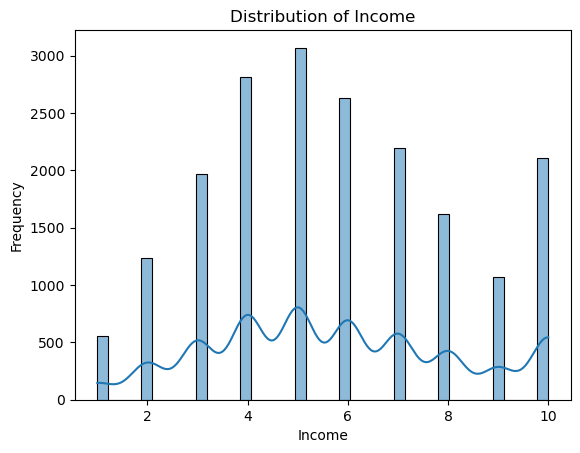

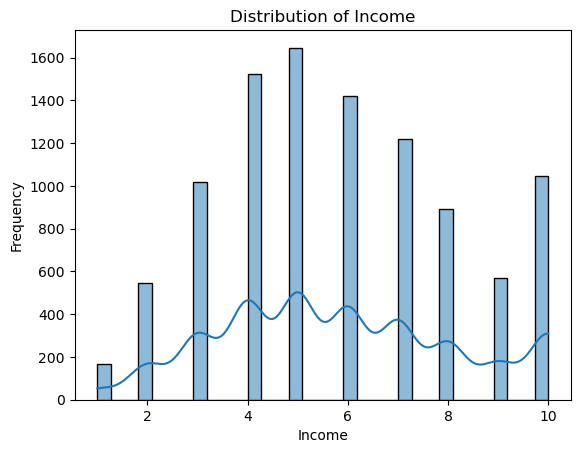

Average Income for 2009 cohort: 5.812717683351577


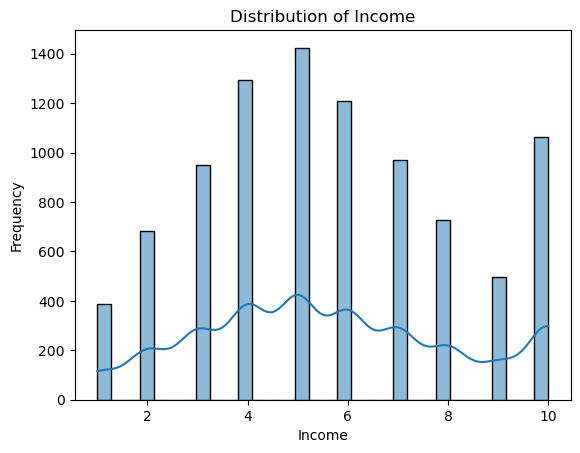

Average Income for 2015 cohort: 5.634694764284163


In [40]:
# distribution of income 
sns.histplot(merged_df['income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

sns.histplot(filtered_df['income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
average_income_merged = filtered_df['income'].mean()
print("Average Income for 2009 cohort:", average_income_merged)

sns.histplot(filtered_df1['income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
average_income_merged = filtered_df1['income'].mean()
print("Average Income for 2015 cohort:", average_income_merged)


In [41]:

# Compute descriptive statistics
descriptive_stats = merged_df.describe()

# Compute frequencies for categorical variables
categorical_vars = ['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + \
                list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('program_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])
frequencies = {}
for var in categorical_vars:
    frequencies[var] = merged_df[var].value_counts()

# Concatenate descriptive statistics and frequencies
table = pd.concat([descriptive_stats, pd.DataFrame(frequencies)], axis=1)

# Transpose the DataFrame
table = table.T

# Reset index
table.reset_index(inplace=True)

# Style the table for better visualization
styled_table = table.style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#f2f2f2')]},
    {'selector': 'td', 'props': [('background', 'white')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#f9f9f9')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#ffff99')]}
])

# Display the styled table
styled_table



,index,count,mean,std,min,25%,50%,75%,max,0,1,2,3,4
0,income,19255.000000,5.727603,2.456078,1.000000,4.000000,5.000000,7.000000,10.000000,nan,nan,nan,nan,nan
1,gpa_new,19255.000000,1.174396,1.295219,0.000000,0.000000,0.000000,2.000000,3.000000,nan,nan,nan,nan,nan
2,class ranking,19255.000000,1.025811,1.141313,0.000000,0.000000,1.000000,2.000000,3.000000,nan,nan,nan,nan,nan
3,age,19255.000000,1.930460,1.042413,1.000000,1.000000,2.000000,3.000000,4.000000,nan,nan,nan,nan,nan
4,coop,19255.000000,1.875513,0.330145,1.000000,2.000000,2.000000,2.000000,2.000000,nan,nan,nan,nan,nan
5,inst_rep,19255.000000,0.383641,0.486285,0.000000,0.000000,0.000000,1.000000,1.000000,nan,nan,nan,nan,nan
6,student_loan,19255.000000,0.523345,0.499468,0.000000,0.000000,1.000000,1.000000,1.000000,nan,nan,nan,nan,nan
7,gender,19255.000000,1.584212,0.492870,1.000000,1.000000,2.000000,2.000000,2.000000,nan,nan,nan,nan,nan
8,year_grad,19255.000000,0.478110,0.499534,0.000000,0.000000,0.000000,1.000000,1.000000,nan,nan,nan,nan,nan
9,"occup_Business, finance and administration occupations",19255.000000,0.168060,0.373929,0.000000,0.000000,0.000000,0.000000,1.000000,nan,nan,nan,nan,nan


In [42]:
x= merged_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + \
                list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('program_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y = merged_df[['income']]

x_train,x_test, y_tain,y_test= train_test_split(x,y, train_size=.6, random_state=69)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'merged_df' contains your dataset and the necessary libraries are imported

# Define independent and dependent variables
x = merged_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + \
                list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('program_')]) + \
                list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y = merged_df['income']

# Ensure that x and y have the same number of samples
if len(x) != len(y):
    raise ValueError("Number of samples in x and y are not the same")

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=69)

# Initialize and fit the OLS model
ols_model = LinearRegression()
ols_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ols_model.predict(x_test)

# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (OLS):", mse_linear)


Mean Squared Error (OLS): 5.034424437027899


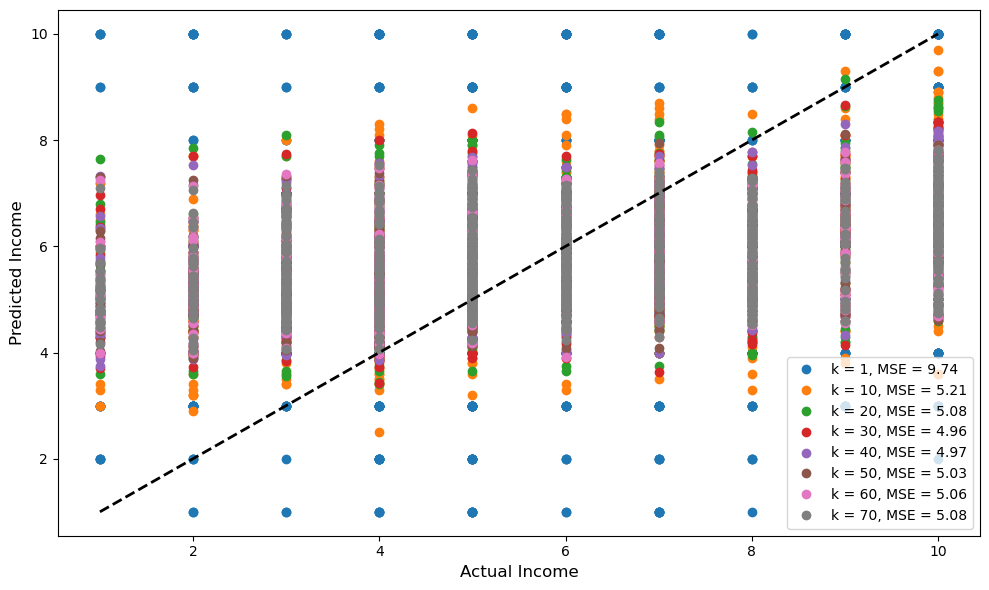

In [44]:
#KNN Regression

# Take a subset of your merged_df DataFrame
subset_merged_df = merged_df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed
mse_values=[]

# Define independent and dependent variables
x = subset_merged_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'class ranking'] + \
                     list(subset_merged_df.columns[subset_merged_df.columns.str.startswith('occup_')]) + \
                     list(subset_merged_df.columns[subset_merged_df.columns.str.startswith('program_')]) + \
                     list(subset_merged_df.columns[subset_merged_df.columns.str.startswith('cert_lvl_')])]
y = subset_merged_df[['income']]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=69)

# Define range of k values
k_values = [1, 10, 20, 30, 40, 50, 60, 70]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over selected k values
for k_value in k_values:   
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=k_value)
    
    # Fit the model on the train data
    model.fit(x_train, y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_test, y_pred)
    mse_values.append(MSE)

    # Plot the data and various KNN model predictions for selected k values
    ax.plot(y_test, y_pred, 'o', label=f'k = {k_value}, MSE = {MSE:.2f}')

# Plot the diagonal line (perfect prediction)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set labels and legend
ax.set_xlabel('Actual Income', fontsize=12)
ax.set_ylabel('Predicted Income', fontsize=12)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


Mean Squared Error (subset): 5.764809596364496


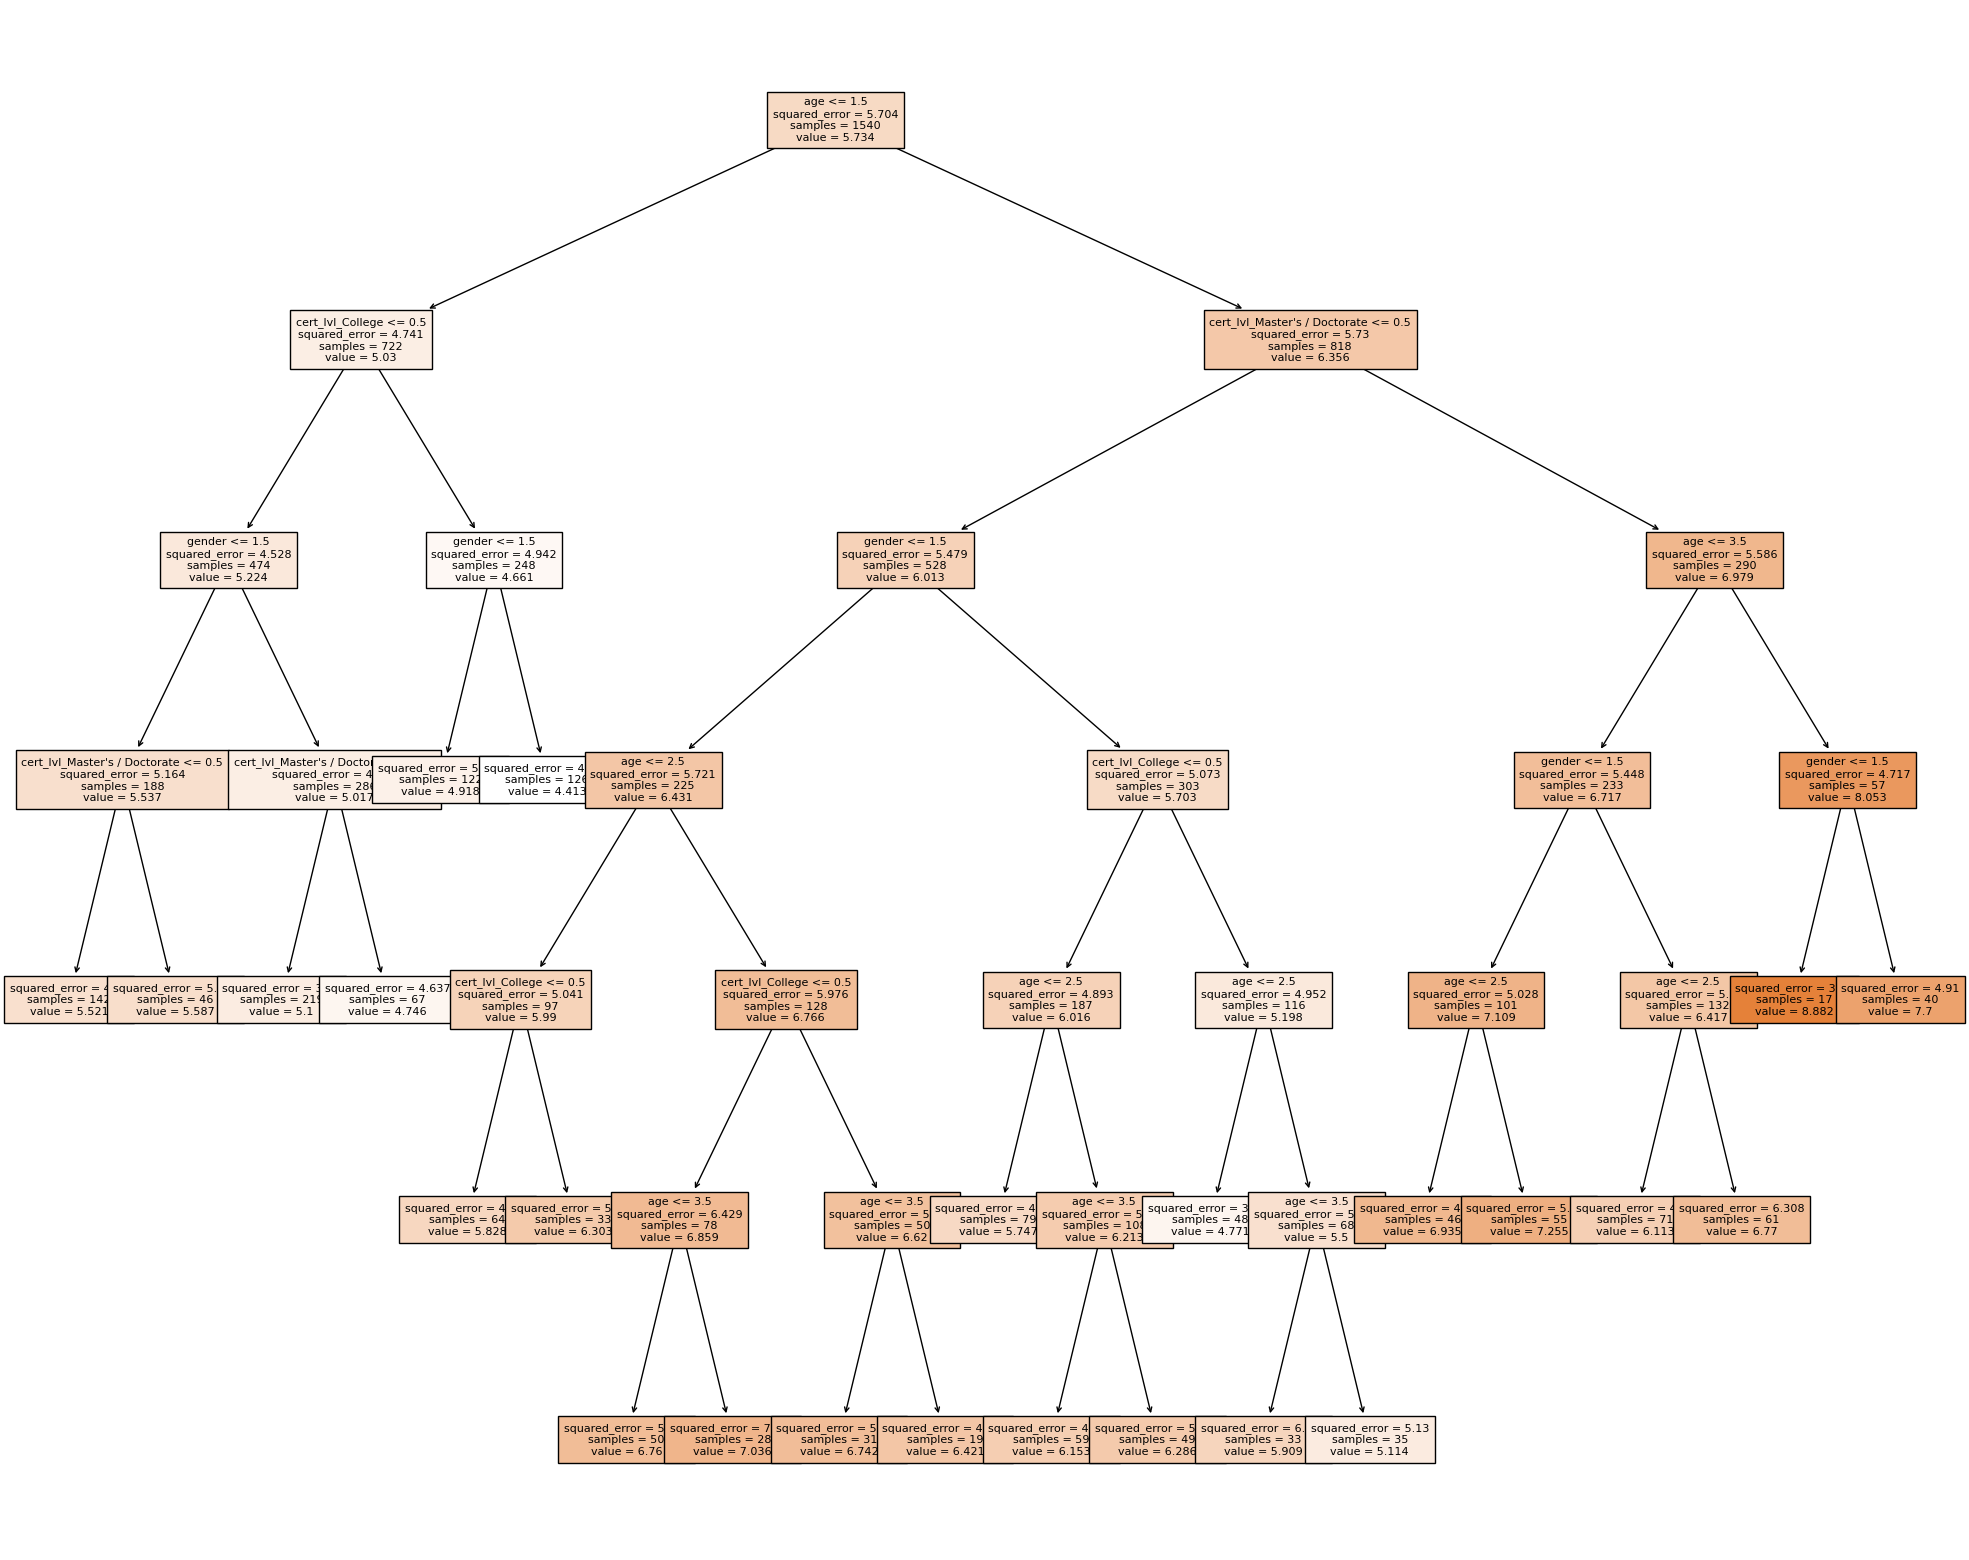

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Take a subset of your merged_df DataFrame
subset_merged_df = merged_df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Split the subset data into independent variables (X) and the target variable (y)
X_subset = subset_merged_df[[ 'age', 'gender', 'cert_lvl_College', "cert_lvl_Master's / Doctorate"  ]]
y_subset = subset_merged_df['income']

# Split the subset data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_regressor_subset = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor_subset.fit(X_train_subset, y_train_subset)

# Predict on the test data
y_pred_subset = dt_regressor_subset.predict(X_test_subset)

# Calculate mean squared error
mse_subset = mean_squared_error(y_test_subset, y_pred_subset)
print("Mean Squared Error (subset):", mse_subset)

# Visualize the decision tree
plt.figure(figsize=(25, 20))
plot_tree(dt_regressor_subset, feature_names=X_subset.columns.tolist(), filled=True, fontsize=8)
plt.show()

In [46]:
from prettytable import PrettyTable

# Create a PrettyTable instance
table = PrettyTable(["Model", "MSE"])

# Add rows to the table for each model's MSE
table.add_row(["OLS (Linear Regression)", mse_linear])
table.add_row(["Decision Tree Regression (Subset)", mse_subset])

# Add rows for KNN models
for i, k_value in enumerate(k_values):
    table.add_row([f"KNN Regression (k={k_value})", mse_values[i]])

# Print the table
print(table)


+-----------------------------------+-------------------+
|               Model               |        MSE        |
+-----------------------------------+-------------------+
|      OLS (Linear Regression)      | 5.034424437027899 |
| Decision Tree Regression (Subset) | 5.764809596364496 |
|        KNN Regression (k=1)       |  9.74189364461738 |
|       KNN Regression (k=10)       |  5.21295719844358 |
|       KNN Regression (k=20)       | 5.083891050583658 |
|       KNN Regression (k=30)       | 4.963060959792478 |
|       KNN Regression (k=40)       | 4.973959143968872 |
|       KNN Regression (k=50)       | 5.026794811932556 |
|       KNN Regression (k=60)       | 5.060517725897103 |
|       KNN Regression (k=70)       | 5.077709309404696 |
+-----------------------------------+-------------------+


In [48]:
# implementing LASSO regression for 'normalization' of variables 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd

# Define your features (X) and target variable (y)
X = merged_df[['gpa_new', 'age', 'coop', 'inst_rep', 'student_loan', 'gender'] + 
           list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('program_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y = merged_df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.05)  # You can adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, y_train)

# Create a DataFrame to store the coefficients
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_model.coef_})

# Print Lasso regression results
print("Lasso Regression Results:")
print(f"Intercept: {lasso_model.intercept_}")
print(coef_df)


Lasso Regression Results:
Intercept: 5.453791006804279
                                             Variable  Coefficient
0                                             gpa_new    -0.000000
1                                                 age     0.583083
2                                                coop    -0.000000
3                                            inst_rep     0.018060
4                                        student_loan    -0.000000
5                                              gender    -0.484203
6   occup_Business, finance and administration occ...    -0.000000
7                            occup_Health occupations     0.016486
8                        occup_Management occupations     0.000000
9   occup_Natural and applied sciences and related...     0.041162
10  occup_Occupations in art, culture, recreation ...    -0.000000
11  occup_Occupations,education,law,social,communi...    -0.000000
12                occup_Sales and service occupations    -0.350842
13  occ